In [65]:
import cv2
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
img = cv2.imread('hyfok.jpg')
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [123]:
hsv_img.shape

(640, 640, 3)

In [139]:
def isblue(a):
    if a[0]>100 and a[0]<124 and a[1]>43 and a[2]>46:
        return True
    else:
        return False

In [140]:
_,col,_ = hsv_img.shape
weight,height = 0,0
th = col/10
x = dx = th/2
y = 0
for r in hsv_img:
    flag1,flag2 = 0,0
    for i in range(col-1):
        if i>x-dx and i<x+weight+dx or weight==0:
            if isblue(r[i]):        
                flag1+=1
                if flag1>th:
                    flag2=1
                    if flag1>weight:
                        weight = flag1
                        x = i - weight
            else:
                if flag1>0:
                    flag1 = 0
    height += flag2
    if height==0:
        y+=1
x = int(x)

In [141]:
weight,height,x,y

(0, 0, 32, 640)

In [142]:
cv2.rectangle(img,(x,y),(x+weight,y+height),(255,0,0),2);

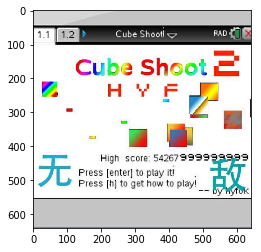

In [143]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))